## Introduction

This notebook analyzes sentiment and theme data from bank app reviews to extract actionable insights, identify key drivers and pain points, and visualize trends across Bank of Abyssinia, Commercial Bank of Ethiopia, and Dashen Bank. The analysis leverages Python libraries such as Matplotlib, Seaborn, and WordCloud to generate plots and keyword clouds, providing a comprehensive view of user feedback.

---

### Setup Environment

This section imports necessary libraries and sets up the environment for data analysis and visualization.

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd

from scripts.visuals import (
    plot_sentiment_distribution,
    plot_rating_distribution,
    plot_theme_counts,
    generate_wordcloud,
    theme_counts_table
)

### Load Data

This section loads review data for each bank from CSV files located in the data directory, assigns the bank name to each dataset, and combines them into a single DataFrame for comparative analysis.

In [2]:
input_dir = "../data"
files = [f for f in os.listdir(input_dir) if f.endswith("_with_sentiment_themes.csv")]
bank_dfs = {}

for file in files:
    bank_name = file.replace("_reviews_with_sentiment_themes.csv", "").replace("_", " ").title()
    df = pd.read_csv(os.path.join(input_dir, file))
    df['bank'] = bank_name
    bank_dfs[bank_name] = df

# Combine all for comparison plots
combined_df = pd.concat(bank_dfs.values(), ignore_index=True)

### Visualizations

This section generates and displays various visualizations to explore sentiment, ratings, and themes across the banks.

- **Sentiment Distribution**: A count plot showing the distribution of neutral, negative, and positive sentiments for each bank.
- **Rating Distribution**: A count plot illustrating the frequency of 1–5 star ratings per bank.
- **Theme Counts**: A bar plot highlighting the most mentioned themes (excluding 'Other') across banks.
- **Word Clouds**: Individual keyword clouds for each bank, reflecting the most frequent terms in reviews.
- **Theme Counts Table**: A styled table summarizing theme mentions by bank.

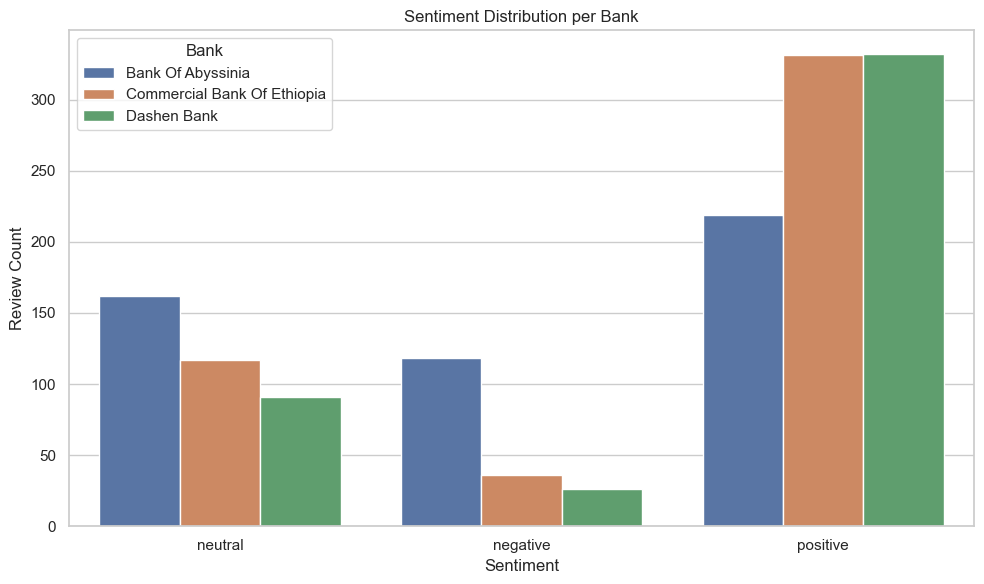

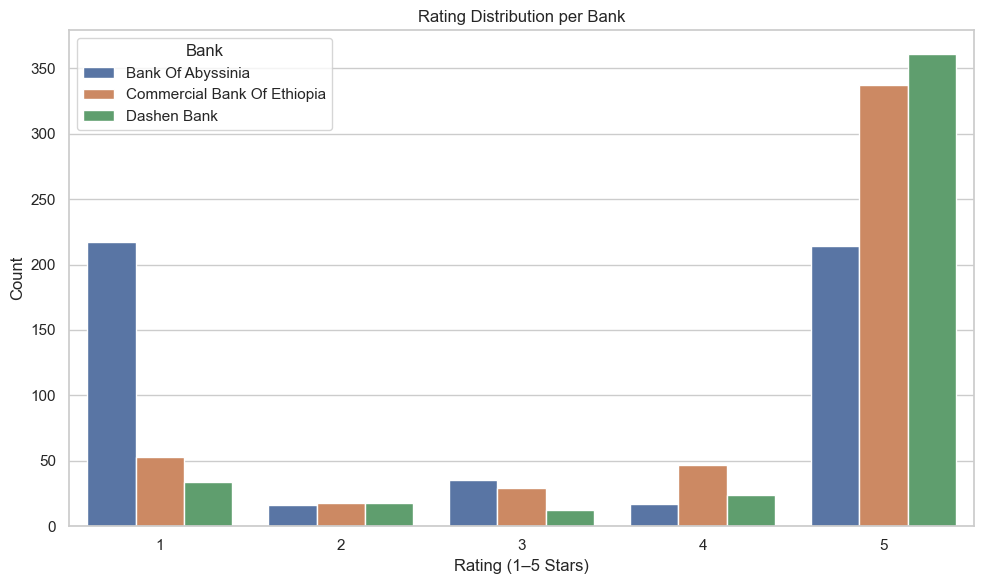

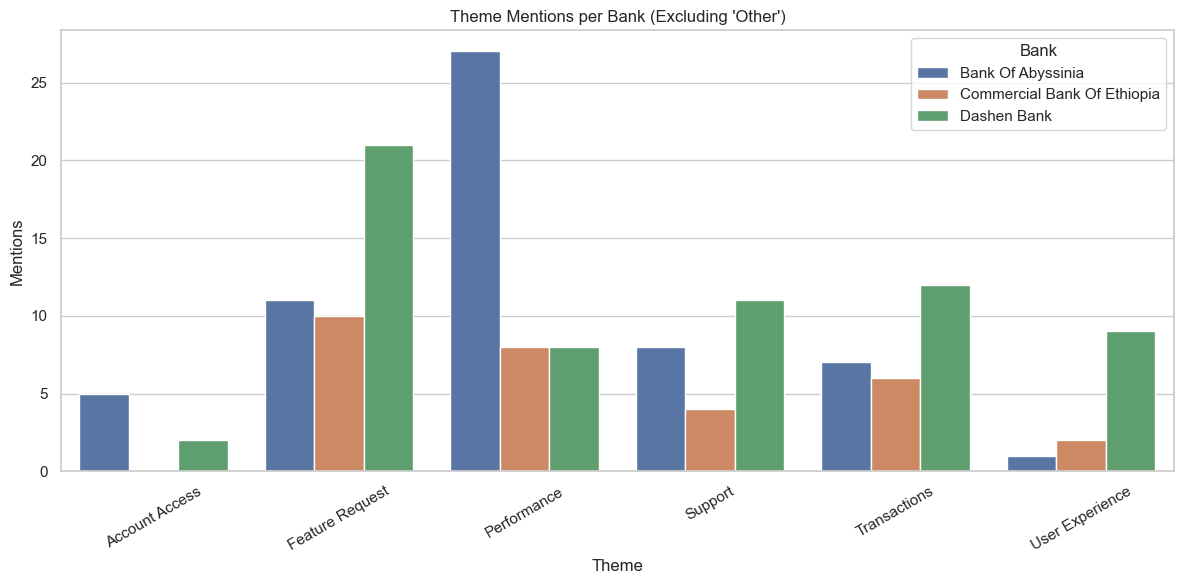

Themes,Bank Of Abyssinia,Commercial Bank Of Ethiopia,Dashen Bank,Total
Performance,27,8,8,43
Feature Request,11,10,21,42
Transactions,7,6,12,25
Support,8,4,11,23
User Experience,1,2,9,12
Account Access,5,0,2,7


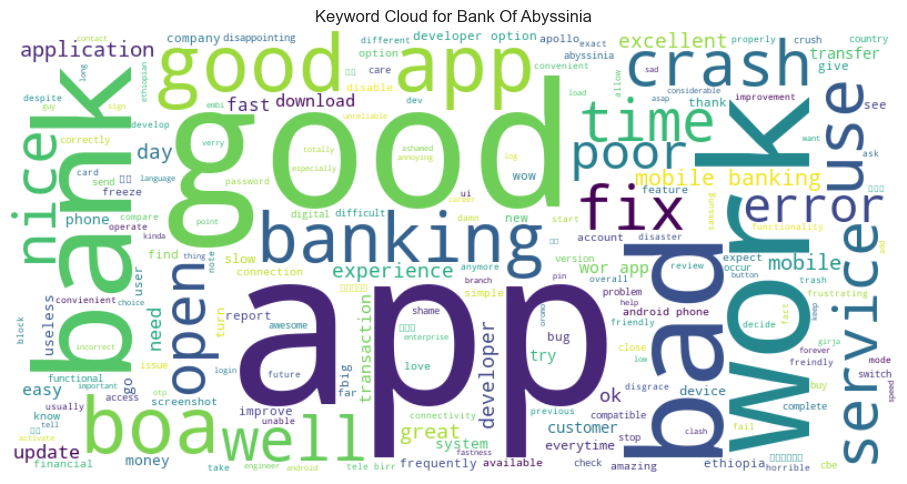

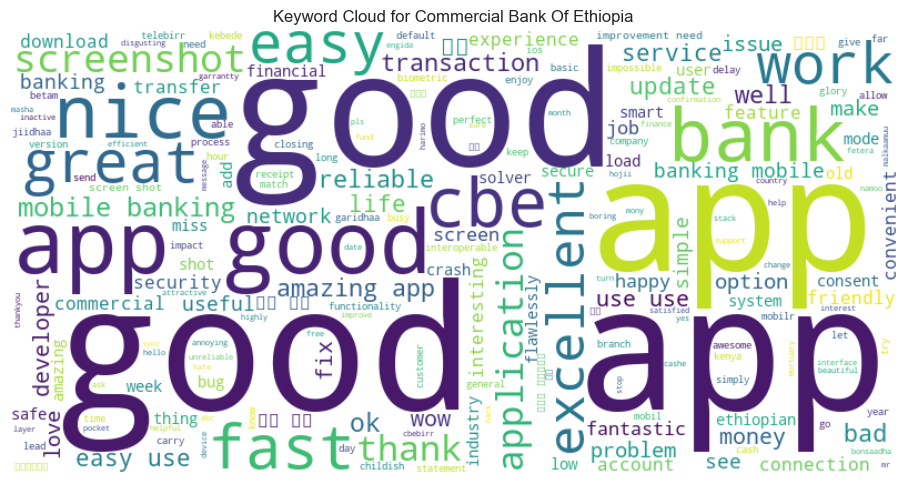

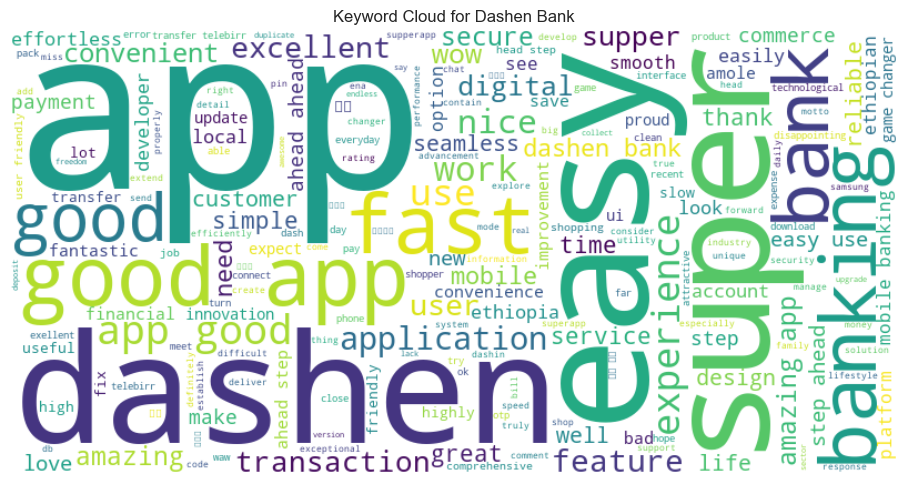

In [3]:
plot_sentiment_distribution(combined_df)
plot_rating_distribution(combined_df)
plot_theme_counts(combined_df)

table = theme_counts_table(combined_df)
display(table)

for bank, df in bank_dfs.items():
    generate_wordcloud(df, column="keywords", title=f"Keyword Cloud for {bank}")

### Insights and Recommendations

Based on the visualizations and data analysis, the following insights and recommendations are derived:

- **Drivers of Positive Sentiment**:
  - **Ease of Use and Performance**: Bank of Abyssinia and Dashen Bank show strong positive sentiment (around 300 reviews each), with keyword clouds highlighting terms like "easy," "fast," and "excellent." This suggests that intuitive navigation and reliable performance are key drivers of customer satisfaction.
  - **Feature Requests**: Dashen Bank leads with 21 mentions of feature requests, indicating a proactive user base that values innovation, which could be leveraged to enhance engagement.

- **Pain Points**:
  - **Negative Sentiment and Crashes**: Bank of Abyssinia has a notable negative sentiment peak (around 100 reviews), with keywords like "crash," "bug," and "poor" suggesting technical issues that need addressing. Commercial Bank of Ethiopia also shows a smaller negative sentiment cluster (around 50 reviews).
  - **Low Ratings**: All banks have a concentration of 1–2 star ratings (50–100 reviews), particularly Bank of Abyssinia, pointing to dissatisfaction that may stem from unresolved issues like app stability or customer support.

- **Comparison Across Banks**:
  - Bank of Abyssinia has the highest review volume across sentiments and ratings, indicating greater visibility but also more criticism. Commercial Bank of Ethiopia excels in positive sentiment (300 reviews) but lags in theme mentions like support (4 mentions). Dashen Bank balances well with strong feature request interest and moderate positive sentiment (300 reviews).
  
- **Recommendations for App Improvements**:
  - **Enhance App Stability**: Address crashes and bugs, especially for Bank of Abyssinia, by implementing rigorous testing and user feedback loops.
  - **Add a Budgeting Tool**: Given the interest in features (e.g., Dashen Bank’s 21 mentions), introducing a budgeting or financial planning tool could boost user engagement and satisfaction.

- **Ethical Considerations**:
  - Potential review biases include a negative skew, as dissatisfied users are more likely to leave reviews. This may overrepresent pain points, suggesting a need for balanced data collection (e.g., incentivizing positive feedback).